In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [288]:
import kagglehub
path = kagglehub.dataset_download("deepcontractor/marvel-comic-books")
print("Path to dataset files:", path)
df = pd.read_csv(path + "/Marvel_Comics.csv")
df.head()

Path to dataset files: C:\Users\arturk\.cache\kagglehub\datasets\deepcontractor\marvel-comic-books\versions\4


,comic_name,active_years,issue_title,publish_date,issue_description,penciler,writer,cover_artist,Imprint,Format,Rating,Price
0,A Year of Marvels: April Infinite Comic (2016),(2016),A Year of Marvels: April Infinite Comic (2016) #1,"April 01, 2016",The Infinite Comic that will have everyone tal...,Yves Bigerel,Yves Bigerel,Jamal Campbell,Marvel Universe,Infinite Comic,Rated T+,Free
1,A Year of Marvels: August Infinite Comic (2016),(2016),A Year of Marvels: August Infinite Comic (2016...,"August 10, 2016","It’s August, and Nick Fury is just in time to ...",Jamal Campbell,"Chris Sims, Chad Bowers",NaN,Marvel Universe,Infinite Comic,NaN,Free
2,A Year of Marvels: February Infinite Comic (2016),(2016),A Year of Marvels: February Infinite Comic (20...,"February 10, 2016",Join us in a brand new Marvel comics adventure...,"Danilo S. Beyruth, M Mast",Ryan North,NaN,Marvel Universe,Infinite Comic,Rated T+,Free
3,A Year of Marvels: July Infinite Comic (2016),(2016),A Year of Marvels: July Infinite Comic (2016) #1,"June 29, 2016",Celebrating the Fourth of July is complicated ...,Juanan Ramirez,Chuck Wendig,Jamal Campbell,Marvel Universe,Infinite Comic,NaN,Free
4,A Year of Marvels: June Infinite Comic (2016),(2016),A Year of Marvels: June Infinite Comic (2016) #1,"June 15, 2016",Sam Alexander’s finding it hard to cope with t...,Diego Olortegui,Paul Allor,Jamal Campbell,Marvel Universe,Infinite Comic,NaN,Free


In [289]:
df.isna().sum()

comic_name               0
active_years             0
issue_title            526
publish_date           526
issue_description     4597
penciler              9510
writer                7397
cover_artist         22737
Imprint              23308
Format                2098
Rating               22373
Price                 2098
dtype: int64

In [290]:
df["issue_title"] = df["issue_title"].fillna(df["comic_name"])
df["penciler"] = df["penciler"].fillna("Unknown")
df["writer"] = df["writer"].fillna("Unknown")
df["cover_artist"] = df["cover_artist"].fillna("Unknown")
df["Imprint"] = df["Imprint"].fillna("None")
df["Format"] = df["Format"].fillna("None")
df["Rating"] = df["Rating"].fillna("No Rating")

df = df[df["publish_date"] != "November 30, -0001"]
df["publish_date"] = pd.to_datetime(df["publish_date"])

print()
df = df.dropna()
df.size

351696

***Data Exploration***

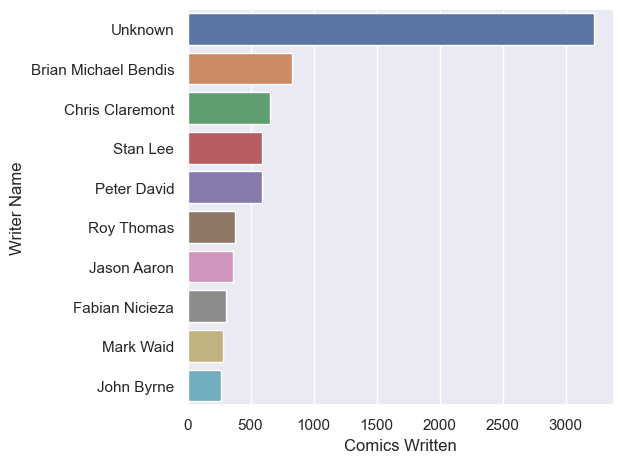

In [291]:
writer_counts = df["writer"].value_counts()
writer_counts = writer_counts[:10]

sns.set_theme(style = "darkgrid")
sns.barplot(x = writer_counts, y = writer_counts.index, hue = writer_counts.index)
plt.xlabel("Comics Written")
plt.ylabel("Writer Name")
plt.tight_layout()
plt.show()

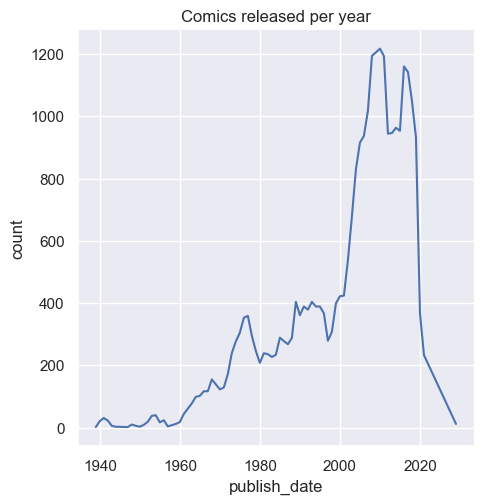

In [292]:
date_counts = df["publish_date"]
date_counts = date_counts.dt.year.value_counts()

sns.relplot(x = date_counts.index, y = date_counts,kind = "line")
plt.title("Comics released per year")
plt.show()

I noticed that the rating system was inconsistent for the ratings. I have changed it to become All Ages, A, T, T+, Parental Advisory, and then Explicit Content. This was a mess of combing all the ratings systmes from the wikipedia page. If multiple warnings were listed, the higher one was taken. Pluses automatically promoted the rating scale. No rating was given to any that said no rating, missing, or something along the lines of "Not in Oracle", which is likely a database issue on the side of the dataset creator.

In [ ]:
df.loc[df["Rating"] == " ALL AGES", "Rating"] = "All Ages"
df.loc[df["Rating"] == "ALL AGES", "Rating"] = "All Ages"
df.loc[df["Rating"] == " All Ages", "Rating"] = "All Ages"

df.loc[df["Rating"] == " RATED A", "Rating"] = "Rated A"
df.loc[df["Rating"] == " Rated a", "Rating"] = "Rated A"
df.loc[df["Rating"] == " Rated A", "Rating"] = "Rated A"
df.loc[df["Rating"] == " A", "Rating"] = "Rated A"
df.loc[df["Rating"] == " Ages 10 & Up", "Rating"] = "Rated A"

df.loc[df["Rating"] == " T", "Rating"] = "Rated T"
df.loc[df["Rating"] == " Rated T", "Rating"] = "Rated T"
df.loc[df["Rating"] == " RATED T", "Rating"] = "Rated T"

df.loc[df["Rating"] == " Rated T+", "Rating"] = "Rated T+"
df.loc[df["Rating"] == " RATED T+", "Rating"] = "Rated T+"
df.loc[df["Rating"] == " T+", "Rating"] = "Rated T+"

df.loc[df["Rating"] == " Marvel Psr", "Rating"] = "Parental Advisory"
df.loc[df["Rating"] == " Marvel PSR", "Rating"] = "Parental Advisory"
df.loc[df["Rating"] == " MARVEL PSR", "Rating"] = "Parental Advisory"
df.loc[df["Rating"] == " Parental Advisory", "Rating"] = "Parental Advisory"
df.loc[df["Rating"] == " PARENTAL ADVISORY", "Rating"] = "Parental Advisory"
df.loc[df["Rating"] == " Parental AdvisorySLC", "Rating"] = "Parental Advisory"
df.loc[df["Rating"] == " Parental Advisoryslc", "Rating"] = "Parental Advisory"
df.loc[df["Rating"] == " PARENTAL ADVISORYSLC", "Rating"] = "Parental Advisory"
df.loc[df["Rating"] == " PARENTAL SUPERVISION", "Rating"] = "Parental Advisory"
df.loc[df["Rating"] == " Parental Guidance", "Rating"] = "Parental Advisory"

df.loc[df["Rating"] == " EXPLICIT CONTENT", "Rating"] = "Explicit Content"
df.loc[df["Rating"] == " Explicit Content", "Rating"] = "Explicit Content"
df.loc[df["Rating"] == " MAX", "Rating"] = "Explicit Content"
df.loc[df["Rating"] == " Max", "Rating"] = "Explicit Content"
df.loc[df["Rating"] == " MARVEL PSR+", "Rating"] = "Explicit Content"
df.loc[df["Rating"] == " Parental Advisory/Explicit Content", "Rating"] = "Explicit Content"
df.loc[df["Rating"] == " PARENTAL ADVISORY/EXPLICIT CONTENT", "Rating"] = "Explicit Content"
df.loc[df["Rating"] == " Marvel Psr+", "Rating"] = "Explicit Content"
df.loc[df["Rating"] == " Mature", "Rating"] = "Explicit Content"

df.loc[df["Rating"] == " No Rating", "Rating"] = "No Rating"
df.loc[df["Rating"] == " NO RATING", "Rating"] = "No Rating"
df.loc[df["Rating"] == " NOT IN ORACLE", "Rating"] = "No Rating"
df.loc[df["Rating"] == " Not in Oracle", "Rating"] = "No Rating"

df["Rating"].value_counts()

Rating
No Rating            17048
Rated T+              4323
Rated T               3020
Parental Advisory     2496
All Ages              1173
Rated A                898
Explicit Content       350
Name: count, dtype: int64